In [1]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from rubin_sim.satellite_constellations import (Constellation, starlink_tles_v1,
                                                ModelObservatory,
                                                SatelliteAvoidBasisFunction)
import healpy as hp

In [2]:
tles = starlink_tles_v1()

In [3]:
const = Constellation(tles)

In [4]:
# Reach into the constellation object to get positions of satellites. Only need to 
# do this if you want the full positions. the update_mjd method below is the
# easy way to get alt,az positions of the satellites at a given MJD

MJDOFFSET = 2400000.5
mjd = 60218.5
jd = mjd + MJDOFFSET
t = const.ts.ut1_jd(jd)
# Find the positions of the satellites
positions =  np.array([sat.at(t).position.km for sat in const.sat_list])/6.37e3


Text(0.5, 0.92, 'Starlink V1 (4408 satellites)')

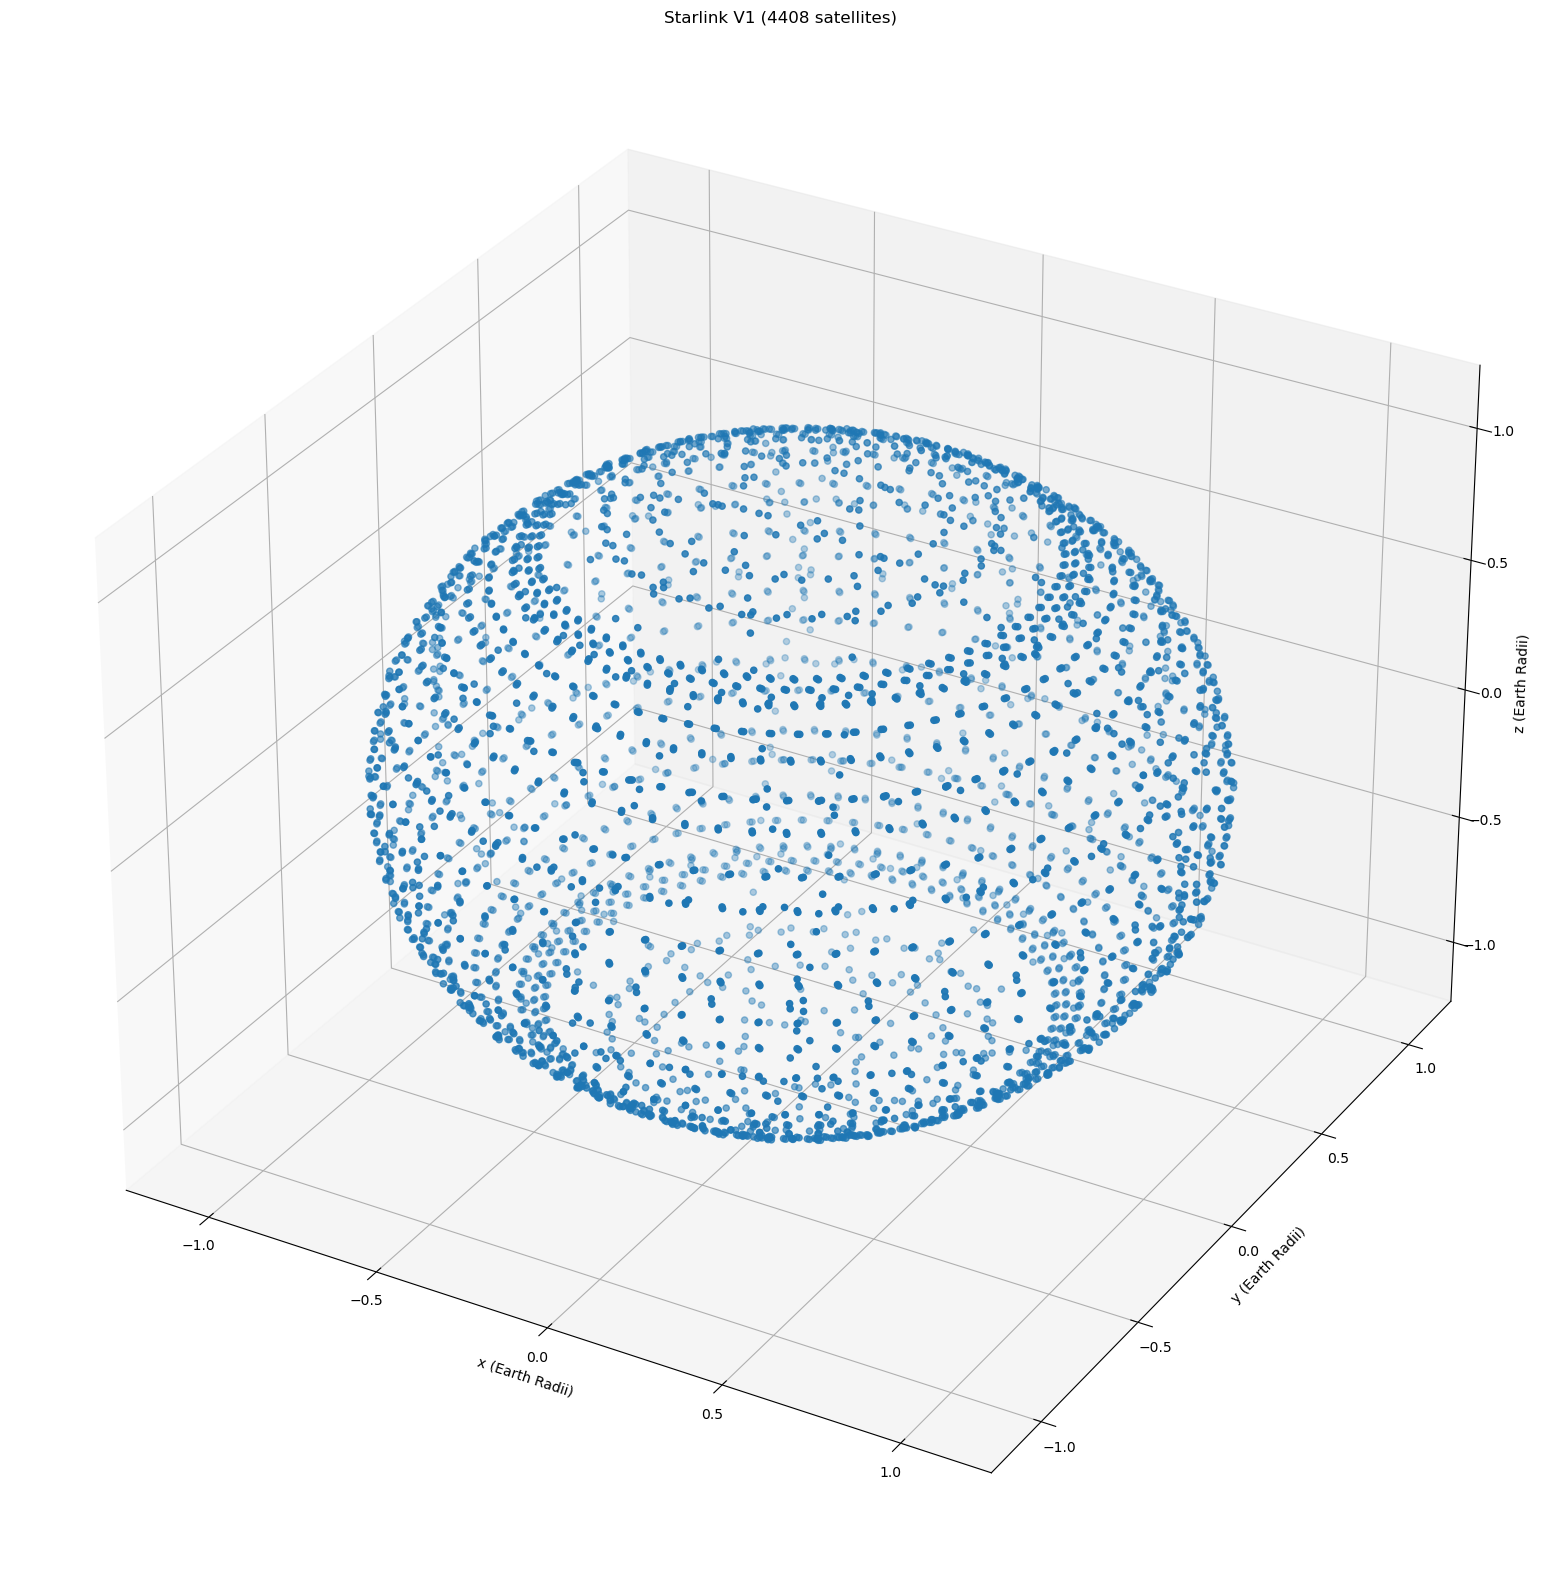

In [5]:
fig = plt.figure(figsize=(20,20))
ax = plt.axes(projection='3d')
ax.scatter(positions[:,0], positions[:,1], positions[:,2])
ax.set_xlabel('x (Earth Radii)')
ax.set_ylabel('y (Earth Radii)')
ax.set_zlabel('z (Earth Radii)')
ax.set_title('Starlink V1 (%i satellites)' % len(tles))


In [6]:
# update the constellation object to a time
const.update_mjd(60218.0018055556)

Text(0, 0.5, 'Altitude (deg)')

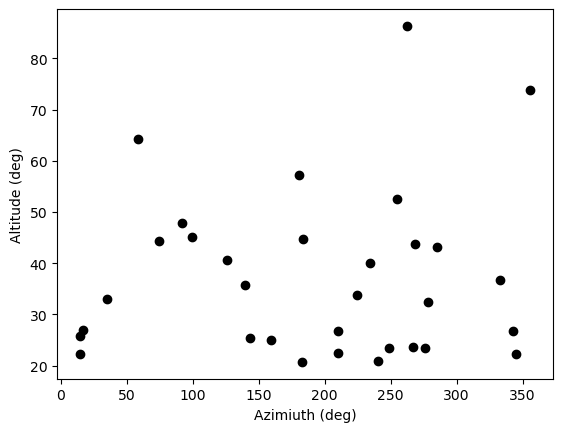

In [7]:
# only plot visible satellites
indx = const.visible
plt.plot(np.degrees(const.azimuth_rad[indx]), np.degrees(const.altitudes_rad[indx]), 'ko')
plt.xlabel('Azimiuth (deg)')
plt.ylabel('Altitude (deg)')

## How it works with the scheduler ##

In [8]:
# This takes a while because it is generating streak maps for a night
mo = ModelObservatory(constellation=const)

In [9]:
bf = SatelliteAvoidBasisFunction()

In [10]:
conditions = mo.return_conditions()


/Users/yoachim/anaconda3/envs/guro/lib/python3.8/site-packages/matplotlib/transforms.py:2662: RuntimeWarning: divide by zero encountered in double_scalars
  x_scale = 1.0 / inw
/Users/yoachim/anaconda3/envs/guro/lib/python3.8/site-packages/matplotlib/transforms.py:2664: RuntimeWarning: invalid value encountered in double_scalars
  self._mtx = np.array([[x_scale, 0.0    , (-inl*x_scale)],
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


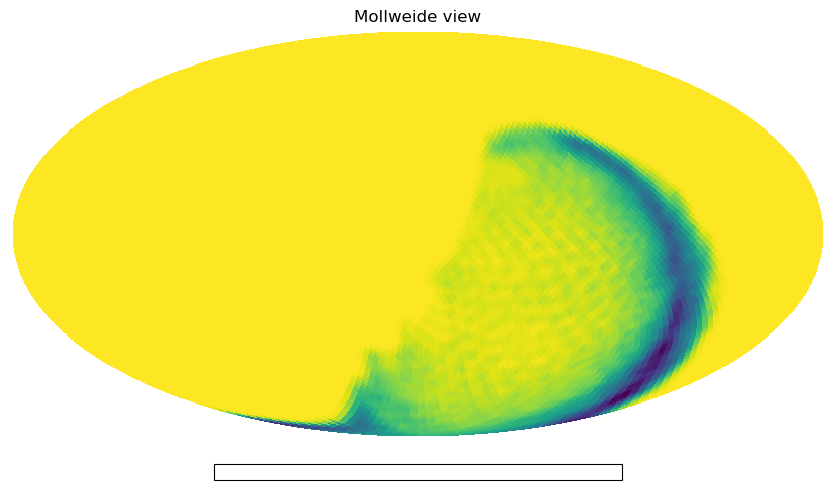

In [11]:
streak_map = bf._calc_value(conditions)
hp.mollview(streak_map)

## Checking observations ##

In [12]:
# generate some fake pointings, just look near the south pole, 32s visits
mjds = conditions.mjd + np.arange(100)*34/3600/24. 
ra = mjds*0
dec = mjds*0 - 89

streak_lengths, n_streaks = const.check_pointings(ra, dec, mjds, visit_time=32.)

In [13]:
streak_lengths

array([0.        , 0.        , 3.4083422 , 0.        , 0.        ,
       0.        , 0.        , 6.71167011, 0.        , 0.        ,
       3.26292232, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 1.23925171, 0.52069876, 0.        ,
       2.17394997, 0.        , 0.        , 0.        , 0.        ,
       1.44983964, 0.98262708, 0.        , 6.16156371, 0.        ,
       0.        , 4.46818014, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [14]:
n_streaks

array([0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])